# Build My Images Data

## Imports

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import keras
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

2024-05-15 10:36:41.925182: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 10:36:41.952201: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 10:36:41.952228: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 10:36:41.952254: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 10:36:41.957489: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 10:36:41.958339: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## Reading Images and Building the Database

### Get all of the data for the images and labels

In [2]:
data = pd.read_csv("imgs/data.csv")

In [3]:
data

,file,label
0,0.png,0
1,1.png,1
2,2.png,2
3,3.png,3
4,4.png,4
5,5.png,5
6,6.png,6
7,7.png,7
8,8.png,8
9,9.png,9


In [16]:
# Can we read one image?
first = np.invert(Image.open("imgs/3.png").convert("L").resize((28,28)))

In [5]:
# first

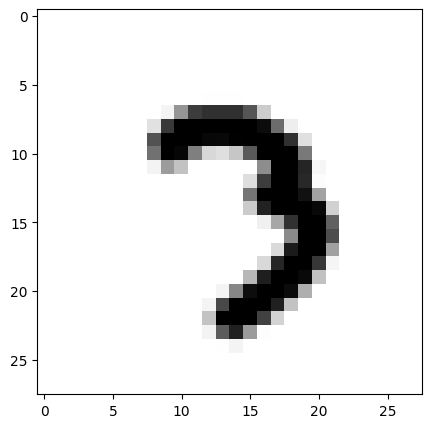

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.grid(False)
ax.imshow(first,cmap=plt.cm.binary)
plt.show()

In [7]:
imgs, labels = [], []

In [8]:
for file in data["file"]:
    #print(file)
    in_img = np.invert(Image.open("imgs/" + file).convert("L").resize((28,28)))
    #print(in_img)
    # in_img.shape
    if len(imgs) == 0:
        imgs = np.expand_dims(in_img, 0)
    else:
        in_img = np.expand_dims(in_img, 0)
        imgs = np.append(imgs, in_img,axis=0)

In [9]:
imgs

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Set up the labels

### labels from dataframe

In [10]:
labels = data["label"].to_numpy()
print(labels)

[0 1 2 3 4 5 6 7 8 9]


## Save all the data to disk

In [12]:
#I am creating a compressed numpy data file with two numpy object:
np.savez("mynumber.npz", image=imgs, labels=labels)

In [13]:
# graphit(the data to graph, the answers, # of rows of graph grid, # of cols of graph grid, where to start in the data, size of graph)
def graphit(images, labels, rows=1, cols=1, start=0, zoom=2):
   #The number of images we have to graph
  n_images = rows * cols
    #Make a graph the correct size
  fig, ax = plt.subplots(rows,cols,figsize=(cols * zoom, rows * zoom))
    # For every graph we need to make
  for n in range(n_images):
    plt.subplot(rows, cols, n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[n+start], cmap=plt.cm.binary)
    # plt.imshow(images[n])
    plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]))
  plt.show()

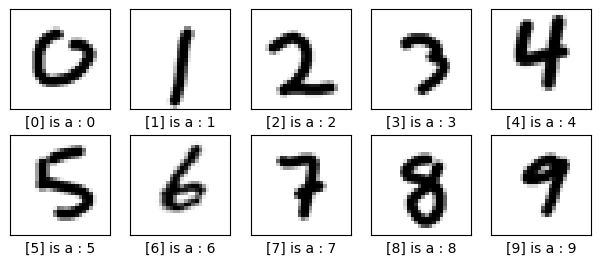

In [14]:
graphit(imgs,labels,2,5,0,zoom=1.5)